Para obtener un mejor resultado es mejor utilizar la aproximación a segundo orden y con varias variables. Como vimos en clase:

$$
\vec y_{n+1} = \vec y_n + h \vec f + \frac{1}{2} h^2 \left( \frac{\partial \vec f}{\partial x} + \mathbb{J} \vec f \right)
$$
donde $f$ es $\vec f(x_n,\vec y_n$), $\mathbb{J}$ es el jacobiano de $f$ evaluado en $(x_o,\vec y_0)$, y el orden del error es de $O(h^2)$

In [2]:
from pylab import *
%matplotlib inline

# Método de Euler con Jacobiano 
(Funciona aun en puntos singulares)

In [66]:
def integrador(ec,d_ec,p_ini,x,h=0.1):
    #f = ec(p_ini)
    #df = d_ec(p_ini)[0]
    #jac = d_ec(p_ini)[0]
    tiempos = arange(x[0],x[1]+h,h)
    solucion = zeros((len(tiempos),len(p_ini)))
    solucion[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(solucion[i,:],tiempos[i])
        df,jac = d_ec(solucion[i,:],tiempos[i])
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
        #yn1 = yn + (h*f) +(0.5*h*h*jac[0]) + dot(jac[1],f) 
    return tiempos,solucion
    

In [60]:
def prueba(y,t):
    return array([y[1],-y[0]])

In [64]:
def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

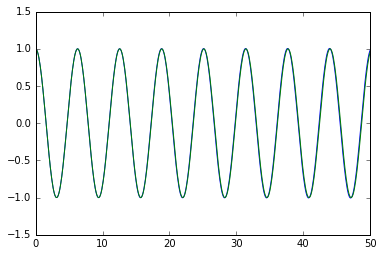

In [71]:
t,y = integrador(prueba,d_prueba,[1,0],[0,50])
#plot(y[:,0],y[:,1])
plot(t,y[:,0],t,cos(t))
show()

Se busca resolver la siguiente ecuación :
$$
\ddot y +2\gamma \dot y+ \omega^2 sin(y) = e^-t
$$

In [79]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

In [80]:
def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

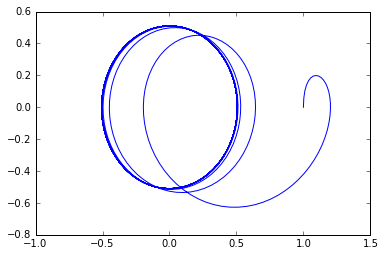

In [83]:
t1,y1 = integrador(p,dp,[1,0],[0,100])
plot(y1[:,0],y1[:,1])

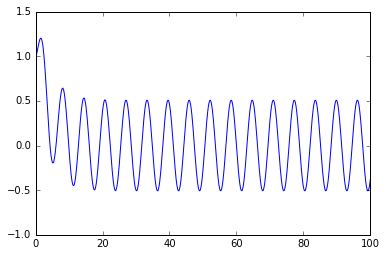

In [85]:
plot(t1,y1[:,0])

#  Método de Runge-Kutta (Segundo Orden)

(Funciona excelente cuando no hay puntos singulares)


In [97]:
def integradorRK(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    solucion = zeros((len(tiempos),len(p_ini)))
    solucion[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h*ec(solucion[i,:],tiempos[i])
        f = ec(solucion[i,:]+(0.5)*k,tiempos[i]+0.5*h)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos,solucion

In [98]:
def ed(y,t):
    return array(y)

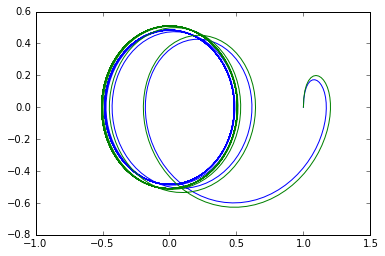

In [102]:
u,v = integradorRK(p,[1,0],[0,100])
plot(v[:,0],v[:,1],y1[:,0],y1[:,1])